<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/AV-JanataHack-Customer-Segmentation/Customer-Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

!kaggle datasets download -d mustang007/customer-sgmentation

!unzip \*.zip  && rm *.zip

  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 40.1MB/s]
Archive:  customer-sgmentation.zip
  inflating: Coustomer_sgmentation/Test_LqhgPWU.csv  
  inflating: Coustomer_sgmentation/Train_aBjfeNk.csv  
  inflating: Coustomer_sgmentation/sample_submission_wyi0h0z.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('/content/Coustomer_sgmentation/Train_aBjfeNk.csv')
test = pd.read_csv('/content/Coustomer_sgmentation/Test_LqhgPWU.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
combine = train.append(test)
combine.shape

(10695, 11)

In [5]:
combine.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
combine.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [7]:
combine['Week'] = combine['ID'] % 7
combine['Month'] = combine['ID'] % 30
combine['Year'] = combine['ID'] % 365
combine['Quarter'] = combine['ID'] % 90

combine['NWeeks'] = combine['ID'] // 7
combine['NYear'] = combine['ID'] // 365
combine['NQuarter'] = combine['ID'] // 90
combine['NMonth'] = combine['ID'] // 30

combine.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Week,Month,Year,Quarter,NWeeks,NYear,NQuarter,NMonth
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,4,29,354,29,66115,1267,5142,15426
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,6,13,188,43,66091,1267,5140,15421
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,3,25,210,25,66616,1277,5181,15543
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1,5,10,35,65962,1265,5130,15391
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,4,9,214,69,66095,1267,5140,15422


In [8]:
combine['Gender'].value_counts()

Male      5841
Female    4854
Name: Gender, dtype: int64

In [9]:
combine['Ever_Married'].value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [10]:
combine['Ever_Married'].fillna('Unknown', inplace=True)
combine['Ever_Married'].value_counts()

Yes        6163
No         4342
Unknown     190
Name: Ever_Married, dtype: int64

In [11]:
combine['Age'].describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [12]:
bins= [17,30,40,50,60,90]
labels = ['Age_Tier1','Age_Tier2','Age_Tier3','Age_Tier4', 'Age_Tier5']
combine['Age'] = pd.cut(combine['Age'], bins=bins, labels=labels, right=False)
combine['Age'].value_counts()

Age_Tier2    2602
Age_Tier1    2429
Age_Tier3    2279
Age_Tier5    1918
Age_Tier4    1467
Name: Age, dtype: int64

In [13]:
combine['Graduated'].value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

In [14]:
combine['Graduated'].fillna('Unknown', inplace=True)
combine['Graduated'].value_counts()

Yes        6570
No         4023
Unknown     102
Name: Graduated, dtype: int64

In [15]:
combine['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [16]:
combine['Profession'].fillna('Unknown', inplace=True)
combine['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Unknown           162
Name: Profession, dtype: int64

In [17]:
combine['Work_Experience'].describe()

count    9597.000000
mean        2.619777
std         3.390790
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [18]:
combine['Work_Experience'].fillna(-1, inplace=True)
bins= [-1, 0, 3, 6, 9, 12, 15]
labels = [6, 5, 4, 3, 2, 1]
combine['Work_Experience'] = pd.cut(combine['Work_Experience'], bins=bins, labels=labels, right=False)
combine['Work_Experience'].value_counts()

5    6587
3    1133
6    1098
4     953
2     741
1     183
Name: Work_Experience, dtype: int64

In [19]:
combine['Spending_Score'].value_counts()

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

In [20]:
combine['Family_Size'].describe()

count    10247.000000
mean         2.844052
std          1.536427
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Family_Size, dtype: float64

In [21]:
def get_family(years):
    switcher = {
        1: "F1",
        2: "F2",
        3: "F3",
        4: "F4",
        5: "F5",
        6: "F6",
        7: "F7",
        8: "F8",
    }
    return (switcher.get(years,"F9"))

combine['Family_Size'] = combine['Family_Size'].apply(lambda x: get_family(x))
combine['Family_Size'].value_counts()

F2    3158
F1    1965
F3    1952
F4    1823
F5     812
F9     508
F6     290
F7     122
F8      65
Name: Family_Size, dtype: int64

In [22]:
combine['Var_1'].value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [23]:
combine['Var_1'].fillna('Unknown', inplace=True)
combine['Var_1'].value_counts()

Cat_6      6910
Cat_4      1475
Cat_3      1089
Cat_2       563
Cat_7       269
Cat_1       167
Cat_5       114
Unknown     108
Name: Var_1, dtype: int64

In [24]:
combine.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Week                  0
Month                 0
Year                  0
Quarter               0
NWeeks                0
NYear                 0
NQuarter              0
NMonth                0
dtype: int64

In [25]:
train_cleaned = combine[combine['Segmentation'].isnull()!=True].drop(['ID'], axis=1)

In [26]:
train_cleaned.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Week', 'Month', 'Year', 'Quarter', 'NWeeks', 'NYear',
       'NQuarter', 'NMonth'],
      dtype='object')

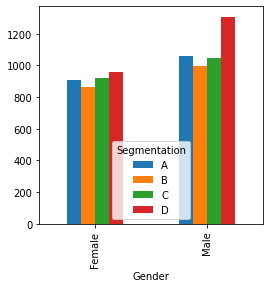

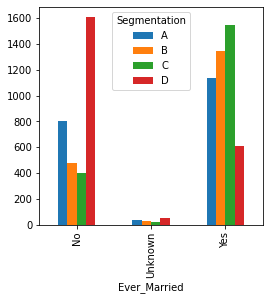

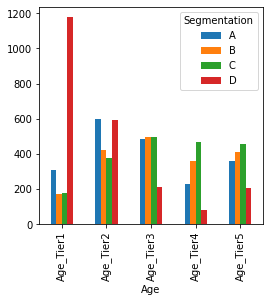

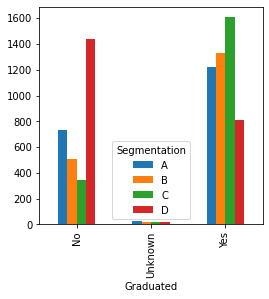

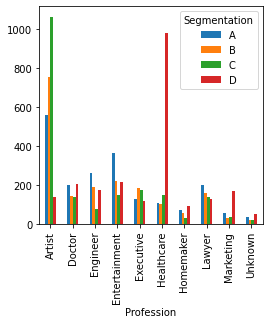

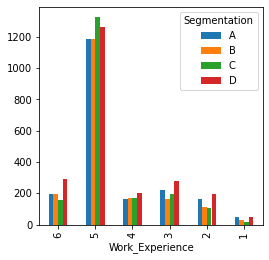

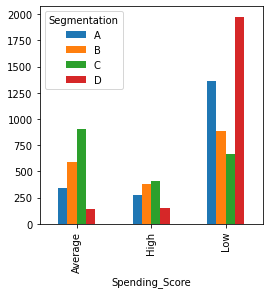

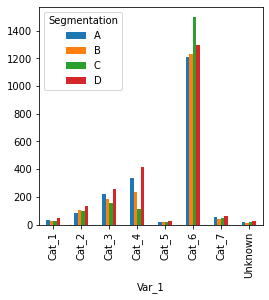

In [27]:
Gender = pd.crosstab(train_cleaned['Gender'], train_cleaned['Segmentation'])
Ever_Married = pd.crosstab(train_cleaned['Ever_Married'], train_cleaned['Segmentation'])
Age = pd.crosstab(train_cleaned['Age'], train_cleaned['Segmentation'])
Graduated = pd.crosstab(train_cleaned['Graduated'], train_cleaned['Segmentation'])
Profession = pd.crosstab(train_cleaned['Profession'], train_cleaned['Segmentation'])
Work_Experience = pd.crosstab(train_cleaned['Work_Experience'], train_cleaned['Segmentation'])
Spending_Score = pd.crosstab(train_cleaned['Spending_Score'], train_cleaned['Segmentation'])
Var_1 = pd.crosstab(train_cleaned['Var_1'], train_cleaned['Segmentation'])



Gender.plot(kind="bar", figsize=(4, 4))
Ever_Married.plot(kind="bar", figsize=(4, 4))
Age.plot(kind="bar", figsize=(4, 4))
Graduated.plot(kind="bar", figsize=(4, 4))
Profession.plot(kind="bar", figsize=(4, 4))
Work_Experience.plot(kind="bar", figsize=(4, 4))
Spending_Score.plot(kind="bar", figsize=(4, 4))
Var_1.plot(kind="bar", figsize=(4, 4))

plt.show()

In [28]:
segmentation = {'A':1, 'B':2, 'C':3, 'D':4}
combine['Segmentation'] = combine['Segmentation'].apply(lambda x: segmentation.get(x))

In [29]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'Ever_Married', 'Spending_Score', 'Var_1', 'Age', 
            'Family_Size', 'Profession', 'Graduated']

encoder = LabelEncoder()
for col in cat_cols:
    combine[col] = encoder.fit_transform(combine[col])
#combine = pd.get_dummies(combine)
combine.shape

(10695, 19)

In [30]:
X = combine[combine['Segmentation'].isnull()!=True].drop(['ID','Segmentation'], axis=1)
y = combine[combine['Segmentation'].isnull()!=True]['Segmentation']

X_test = combine[combine['Segmentation'].isnull()==True].drop(['ID','Segmentation'], axis=1)

X.shape, y.shape, X_test.shape

((8068, 17), (8068,), (2627, 17))

In [31]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Week,Month,Year,Quarter,NWeeks,NYear,NQuarter,NMonth
0,1,0,0,0,5,5,2,3,3,4,29,354,29,66115,1267,5142,15426
1,0,2,1,2,2,6,0,2,3,6,13,188,43,66091,1267,5140,15421
2,0,2,4,2,2,5,2,0,5,3,25,210,25,66616,1277,5181,15543
3,1,2,4,2,7,5,1,1,5,1,5,10,35,65962,1265,5130,15391
4,0,2,2,2,3,6,1,5,5,4,9,214,69,66095,1267,5140,15422


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [34]:
model = LGBMClassifier(n_estimators=5000,
                       max_depth = 20,
                       max_features=0.85,
                       learning_rate=1.1)
model.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1.1, max_depth=20,
               max_features=0.85, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [35]:
pred_val = model.predict(x_val)
accuracy_score(y_val, pred_val)

1.0

In [36]:
confusion_matrix(y_val, pred_val)

array([[380,   0,   0,   0],
       [  0, 396,   0,   0],
       [  0,   0, 386,   0],
       [  0,   0,   0, 452]])

In [37]:
segmentation = {1:'A', 2:'B', 3:'C', 4:'D'}
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['Segmentation'] = [segmentation.get(x) for x in model.predict(X_test)]
submission.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C


In [38]:
submission.to_csv('submission.csv', index=False)